##  자율학습 - 군집
### k-means method
- 임의의 k값을 컴퓨터가 스스로 나누도록 하는 것
- 지도학습과 달리 미리 답을 알려주지 않는다
- 주어지는 것은 몇개로 나눌 것인가를 뜻하는 K값뿐이다

### 주요 알고리즘
- 컴퓨터 스스로 두 점을 찍도록 한다
- 점과 점 사이에 절반으로 구역을 나눈다
- 각 구열 내 점들의 평균을 구해 mean 값을 가지는 점을 찍는다
- 새로 찍힌 점들을 이용해 다시 구역을 나눈다
- 새로 나누어진 구역 내의 점들로 다시 평균을 구한다
- 이것을 반복하다가 평균점이 더 이상 움직이지 않으면 학습이 완료된 것으로 인지한다

랜덤 시작점:  [195, 22] # [68, 1]
[195, 22] ; [68, 1]
[171.74489796  68.2755102 ] ; [140.   67.5]
[176.52439024  70.47560976] ; [146.44444444  58.16666667]
[178.83098592  69.5915493 ] ; [152.20689655  65.        ]
[180.703125  70.859375] ; [154.05555556  63.63888889]
[181.3442623   70.75409836] ; [155.1025641   64.35897436]
[181.96610169  71.55932203] ; [155.48780488  63.51219512]
[181.67241379  69.68965517] ; [156.52380952  66.28571429]
[182.32758621  72.48275862] ; [155.61904762  62.42857143]
[181.73684211  69.21052632] ; [157.02325581  67.        ]
[183.44444444  74.03703704] ; [156.63043478  61.47826087]
[181.75925926  67.7962963 ] ; [158.60869565  68.80434783]
[183.96153846  75.67307692] ; [157.1875      60.22916667]
[181.38461538  66.28846154] ; [159.97916667  70.39583333]
[184.71428571  76.65306122] ; [158.03921569  60.19607843]
[181.34  65.46] ; [160.88  71.06]
[185.          76.85416667] ; [158.28846154  60.32692308]
[181.34  65.46] ; [160.88  71.06]
[185.          76.85416667] ; [

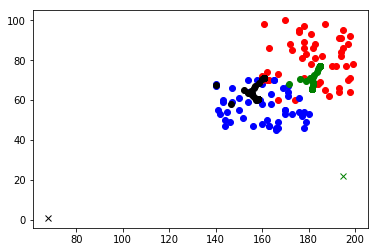

In [134]:
import random
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
r = [] # 남자
b = [] # 여자
p1_save = []
p2_save = []

for i in range(50): # 남.여 각각 50개의 샘플을 생성한다
    r.append([random.randint(160, 200), random.randint(60, 100)])
    b.append([random.randint(140, 180), random.randint(45, 70)])
man = r+b


def number_is_upper(p1, p2, man):
    m  = (p2[1]-p1[1]) / (p2[0]-p1[0])
    a = (p1[0]+p2[0])/2
    b = (p1[1]+p2[1])/2
    line = man[0]- m * man[1] - a + m * b
    if line > 0:
        return True
    else:
        return False
# 이 루프는 함수를 간략화하기 위해 기울기가 0또는 무한대가 나오지 않는 두 점을 뽑는다
while True:
    #p1 = [random.randint(100, 200), random.randint(45, 100)]
    #p2 = [random.randint(100, 200), random.randint(45, 100)]
    p1 = [random.randint(0, 200), random.randint(0, 200)]
    p2 = [random.randint(0, 200), random.randint(0, 200)]
    print("랜덤 시작점: ", p1,"#", p2)
    if (p1[0] != p2[0] and p1[1] != p2[1]):
        break;
#비교를 위해 초기값을 저장한다
p1_init = p1
p2_init = p2

cnt = 0
while(cnt < 50):
    print(p1, ";", p2)
    upper = []
    lower = []
    # 선분 위쪽의 점과 아래쪽 점을 분리하여 upper, lower 리스트에 저장한다
    for i in range(len(man)):
        if (number_is_upper(p1, p2, man[i])):
            upper.append(man[i])
        else:
            lower.append(man[i])
    #upper, lower리스트가 비어있으면 기존 포인트를 그대로 사용하고,
    #그렇지 않으면 리스트의 평균값으로 p1, p2를 바꾼다
    if(len(upper) == 0):
        p1=p1
    else:
        p1 = np.mean(upper, axis= 0 )
        
    if(len(lower) == 0):
        p2=p2
    else:
        p2 = np.mean(lower, axis=0 )
    cnt+=1
    #optional: p1, p2가 변해온 과정을 저장한다
    p1_save.append(p1)
    p2_save.append(p2)

#데이터를 그래프로 출력
for i in range(len(r)):
    plt.plot(r[i][0], r[i][1], marker = 'o', color = 'red')
    plt.plot(b[i][0], b[i][1], marker = 'o', color = 'blue')
for i in range(len(p1_save)):
    plt.plot(p1_save[i][0], p1_save[i][1], marker = 'o', color = 'green')
    plt.plot(p2_save[i][0], p2_save[i][1], marker = 'o', color = 'black')

#plt.plot(p1[0], p1[1], marker = 'o', color = 'green')
#plt.plot(p2[0], p2[1], marker = 'o', color = 'black')
plt.plot(p1_init[0], p1_init[1], marker = 'x', color = 'green')
plt.plot(p2_init[0], p2_init[1], marker = 'x', color = 'black')


IndexError: invalid index to scalar variable.

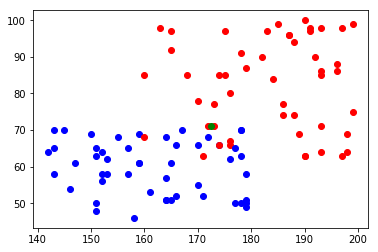

In [122]:
import matplotlib.pyplot as plt
%matplotlib inline
for i in range(50):
    plt.plot(r[i][0], r[i][1], marker = 'o', color = 'red')
    plt.plot(b[i][0], b[i][1], marker = 'o', color = 'blue')
plt.plot(p1[0], p1[1], marker = 'o', color = 'green')
plt.plot(p2[0], p2[1], marker = 'o', color = 'yellow')

In [64]:
def is_upper(p1, p2, man):
    m  = (p2[1]-p1[1]) / (p2[0]-p1[0])
    a = (p1[0]+p2[0])/2
    b = (p1[1]+p2[1])/2
    line = man[0]- m * man[1] - a + m * b
    if line > 0:
        return True
    else:
        return False

In [62]:
np.mean(upper, axis=0)

array([176.10294118,  72.19117647])